In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from os import chdir 
chdir('C:\\Users\\afeki\\Desktop\\Code\\BootStrapDesicionTree\\')

In [2]:
from gradient_boosting_trees.gradient_boosting_regressor import CartGradientBoostingRegressor, \
    CartGradientBoostingRegressorKfold

# Config

In [3]:
A1 = 2
A2 = 5
SIGMNA = 3
N_ROWS = 10**3
CATEGORICAL_DISTRIBUTION = 'uniform'
CATEGORY_SIZE = 50
CATEGORY_COLUMN_NAME = 'category'
Y_COL_NAME = 'y'
LEFT_GROUP = [i for i in range(CATEGORY_SIZE//2)]
SEED = 3
np.random.seed(SEED)

In [4]:
MAX_DEPTH = 4
N_ESTIMATORS = 100
LEARNING_RATE = 0.1

# Create simulated data
$$ y = a_1 \cdot x_1 + a_2 \cdot I(x_2 \in LEFT\_GROUP) + \sigma $$

$$ x1 - N(0,1) $$

In [5]:
X = pd.DataFrame()
X[CATEGORY_COLUMN_NAME] = np.random.randint(0, CATEGORY_SIZE, N_ROWS)
X['x1'] = np.random.randn(N_ROWS)
X[CATEGORY_COLUMN_NAME] = X[CATEGORY_COLUMN_NAME].astype('category')
sigma = SIGMNA*np.random.randn(N_ROWS)
y = A1*X['x1'] + A2*X[CATEGORY_COLUMN_NAME].isin(LEFT_GROUP) + sigma

In [6]:
X.head()

,category,x1
0,42,1.412970
1,24,-0.925253
2,3,-0.645377
3,8,0.685228
4,0,0.031314


## KFOLD

In [7]:
kfold_df = X.copy()
kfold_df[Y_COL_NAME] = y
kfold_gbm = CartGradientBoostingRegressorKfold(Y_COL_NAME, max_depth=MAX_DEPTH, n_estimators=N_ESTIMATORS, learning_rate=LEARNING_RATE)
kfold_gbm.fit(kfold_df)
fi = pd.Series(kfold_gbm.compute_feature_importance()).sort_index()
fi/fi.sum()

tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark
tree is bark

category    0.553501
x1          0.446499
dtype: float64

C:\Users\afeki\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


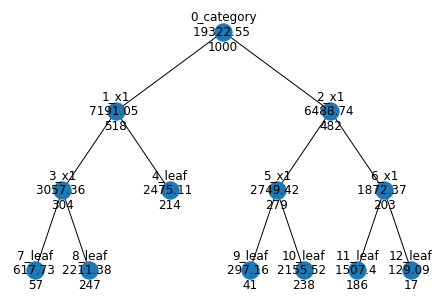

In [8]:
from Tree.tree_visualizer import TreeVisualizer
tree_vis = TreeVisualizer()
tree_vis.plot(kfold_gbm.trees[0].root)

## SKLEARN - One Hot

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=  N_ESTIMATORS, max_depth = MAX_DEPTH - 1,learning_rate = LEARNING_RATE)
clf.fit(pd.get_dummies(X), y)
pd.Series(clf.feature_importances_, index = pd.get_dummies(X).columns)

x1             0.565802
category_0     0.008539
category_1     0.011469
category_2     0.006475
category_3     0.002323
category_4     0.005736
category_5     0.010316
category_6     0.003365
category_7     0.007878
category_8     0.004782
category_9     0.000618
category_10    0.005800
category_11    0.009004
category_12    0.008102
category_13    0.005416
category_14    0.009491
category_15    0.007874
category_16    0.006174
category_17    0.003665
category_18    0.004499
category_19    0.014362
category_20    0.019441
category_21    0.011857
category_22    0.007360
category_23    0.002148
category_24    0.021660
category_25    0.020697
category_26    0.000000
category_27    0.021328
category_28    0.009934
category_29    0.000000
category_30    0.016332
category_31    0.005664
category_32    0.013860
category_33    0.006822
category_34    0.013645
category_35    0.008816
category_36    0.016086
category_37    0.019299
category_38    0.011834
category_39    0.002983
category_40    0

## SKLEARN - Mean Imputing

In [10]:
category_to_mean = kfold_df[[CATEGORY_COLUMN_NAME,'y']].groupby(CATEGORY_COLUMN_NAME)['y'].mean().to_dict()
X_m = X.copy()
X_m[CATEGORY_COLUMN_NAME] = X_m[CATEGORY_COLUMN_NAME].map(category_to_mean)
X_m[CATEGORY_COLUMN_NAME].astype('float')
clf = GradientBoostingRegressor(n_estimators=  N_ESTIMATORS, max_depth = MAX_DEPTH - 1,learning_rate = LEARNING_RATE)
clf.fit(X_m, y)
pd.Series(clf.feature_importances_, index = X_m.columns)

category    0.508933
x1          0.491067
dtype: float64

## XGBOOST - One Hot

In [11]:
import xgboost as xgb

In [12]:
dtrain = xgb.DMatrix(pd.get_dummies(X), label=y)
param = {'max_depth': MAX_DEPTH - 1, 'eta': LEARNING_RATE, 'objective': 'reg:linear'}
num_round = N_ESTIMATORS
bst = xgb.train(param, dtrain, num_round)

[19:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


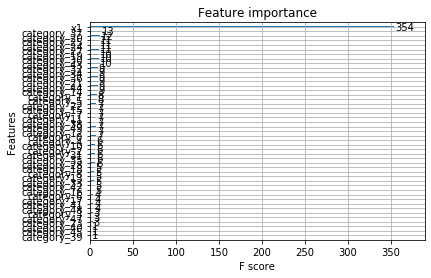

In [13]:
xgb.plot_importance(bst)
plt.show()

In [14]:
bst.get_score(importance_type='gain')

{'x1': 85.11411680499711,
 'category_27': 113.1035821909091,
 'category_20': 88.38643237499998,
 'category_24': 103.33416131818181,
 'category_48': 104.6764003,
 'category_43': 104.23638500000001,
 'category_16': 53.5707138,
 'category_37': 83.58197846923078,
 'category_14': 57.48969608888889,
 'category_0': 55.95907104285714,
 'category_5': 70.9041156625,
 'category_25': 111.36037933636362,
 'category_44': 116.69687953333333,
 'category_21': 72.60054360000001,
 'category_36': 98.90028639999998,
 'category_30': 97.38531779,
 'category_34': 89.94210059999999,
 'category_32': 95.49792642222222,
 'category_41': 76.04951477499999,
 'category_12': 64.14706802857144,
 'category_49': 99.51610715714286,
 'category_28': 86.41901895,
 'category_19': 81.67775228,
 'category_38': 94.9047531,
 'category_42': 74.50003819999999,
 'category_1': 80.0541849375,
 'category_11': 71.63214824285716,
 'category_33': 76.90052483999999,
 'category_35': 86.20674078333333,
 'category_31': 58.82889813333333,
 'ca

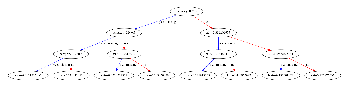

In [15]:
xgb.plot_tree(bst,num_trees= 58)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

## XGBOOST - Mean Imputing

In [16]:
X_m[CATEGORY_COLUMN_NAME] = X_m[CATEGORY_COLUMN_NAME].astype('float')

In [17]:
dtrain = xgb.DMatrix(X_m, label=y)
param = {'max_depth': MAX_DEPTH - 1, 'eta': LEARNING_RATE, 'objective': 'reg:linear'}
num_round = N_ESTIMATORS
bst = xgb.train(param, dtrain, num_round)

[19:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


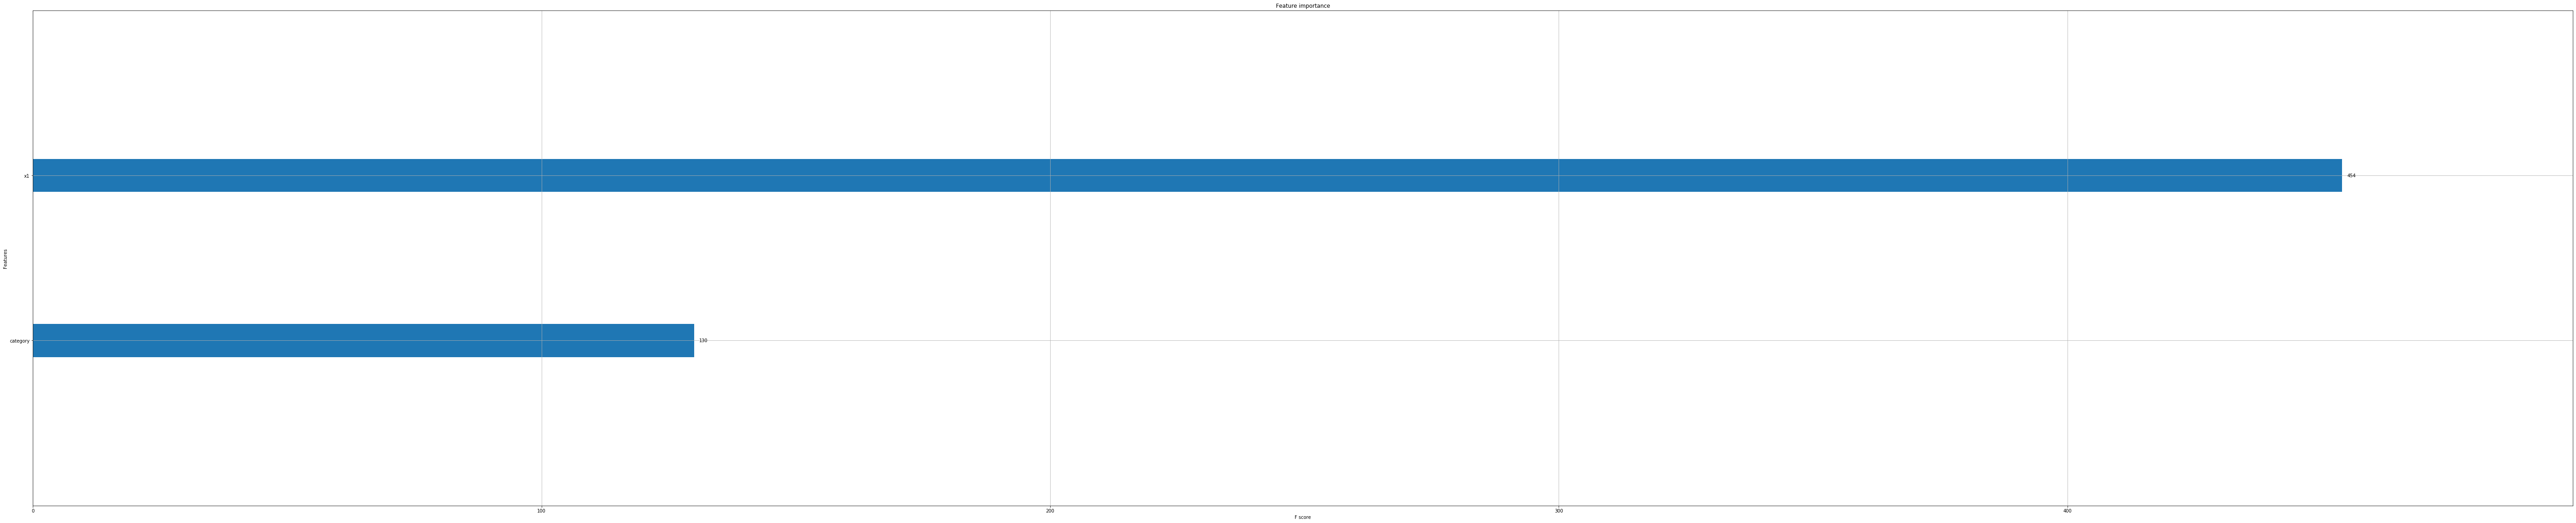

In [18]:
xgb.plot_importance(bst)
plt.show()

In [19]:
bst.get_score(importance_type='gain')

{'category': 252.82007834878777, 'x1': 66.31948616637446}

## Catboost

In [20]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [21]:
from catboost import Pool, CatBoostRegressor
# initialize data
# initialize Pool
train_pool = Pool(X, 
                  y, 
                  cat_features=[0])

# specify the training parameters 
model = CatBoostRegressor(iterations=100, 
                          depth=3, 
                          learning_rate=0.1, 
                          loss_function='RMSE')
#train the model
model.fit(train_pool)

0:	learn: 4.2297871	total: 63.9ms	remaining: 6.33s
1:	learn: 4.0978215	total: 67.8ms	remaining: 3.32s
2:	learn: 3.9776130	total: 70.6ms	remaining: 2.28s
3:	learn: 3.8806029	total: 73.3ms	remaining: 1.76s
4:	learn: 3.7981203	total: 75ms	remaining: 1.43s
5:	learn: 3.7240468	total: 76.4ms	remaining: 1.2s
6:	learn: 3.6488668	total: 78.6ms	remaining: 1.04s
7:	learn: 3.5982575	total: 80.3ms	remaining: 924ms
8:	learn: 3.5557434	total: 81.6ms	remaining: 825ms
9:	learn: 3.5080297	total: 82.8ms	remaining: 746ms
10:	learn: 3.4688699	total: 83.9ms	remaining: 679ms
11:	learn: 3.4400257	total: 84.9ms	remaining: 623ms
12:	learn: 3.4202865	total: 85.9ms	remaining: 575ms
13:	learn: 3.3989061	total: 86.6ms	remaining: 532ms
14:	learn: 3.3847598	total: 87.4ms	remaining: 495ms
15:	learn: 3.3702119	total: 88.3ms	remaining: 463ms
16:	learn: 3.3569939	total: 89.1ms	remaining: 435ms
17:	learn: 3.3413643	total: 89.9ms	remaining: 410ms
18:	learn: 3.3292642	total: 90.7ms	remaining: 387ms
19:	learn: 3.3210451	tota

In [22]:
print(model.feature_names_)
model.feature_importances_

['category', 'x1']


array([43.87615703, 56.12384297])